In [1]:
#pip install ultralytics

In [2]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import shutil

In [3]:
model = YOLO("algaex40-healthy-infected-vol14_100epoch.pt")

In [4]:
dir_path = os.path.dirname(os.path.abspath("cells_count.ipynb"))
if(not os.path.exists(dir_path + "\cells_counted")): os.makedirs(dir_path + "\cells_counted")
if(os.path.exists(dir_path + "\\runs")): shutil.rmtree(dir_path + "\\runs", ignore_errors=True)

In [5]:
file_name = "test_photo1.jpg"
results = model.predict(file_name, save=True)
result = results[0]


image 1/1 c:\Users\aleksander.kolodziej\Desktop\Cells_count\test_photo1.jpg: 640x640 40 Algaes, 1267.6ms
Speed: 3.0ms preprocess, 1267.6ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


In [6]:
count_algae = 0
count_infection = 0

for item in result.boxes:
    if(item.cls[0].item() == 0):
        count_algae +=1
    else: count_infection += 1


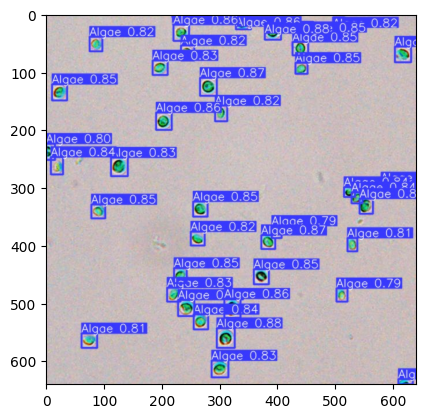

In [7]:
os.chdir(dir_path + "\\runs\detect\predict")
image = cv2.imread(file_name)

plt.imshow(image)
plt.show()

In [8]:
box = image[0:52, 0:275]
box_parameters = box.shape
for n in range(box_parameters[0]):
    for y in range(box_parameters[1]):
        box[n][y] = (0,0,0)
image = cv2.putText(image, "Counted Infections:  " + str(count_infection), (5,45), cv2.FONT_HERSHEY_SIMPLEX , 0.75, (255, 255, 255), 2, cv2.LINE_AA)
image = cv2.putText(image, "Counted Algaes:    " + str(count_algae), (5,20), cv2.FONT_HERSHEY_SIMPLEX , 0.75, (255, 255, 255), 2, cv2.LINE_AA)

In [9]:
os.chdir(dir_path + "\cells_counted")
cv2.imwrite(file_name, image)

True